In [1]:
import pyximport
pyximport.install()
#import despotic
from despotic import cloud
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.visualization import quantity_support
from cycler import cycler
from itertools import cycle

In [2]:
g5 = cloud()
g5.nH = 1.0e2
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 # nonthermal, turbulence
g5.Tg = 60.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1
#g5.TradDust = 1.0

In [3]:
g5.addEmitter("CO", 1.0e-4)
# 10^-13 to 10^-6
# 10^-6 to 10^-7 in high velocity gas, less than 10^-11 in ambient medium from Schilke et al 1997
#abund = np.linspace(10**(-13), 10**(-6), num=5)
abund = 10**(-7)
g5.addEmitter("SiO", abund)
#abund_1 = 10**(-8.5)
#g5.addEmitter("ph2co-h2", abund)

In [4]:
lines = g5.lineLum("SiO")

/blue/adamginsburg/adamginsburg/repos/despotic/despotic/radiation.py:107: RuntimeWarning: divide by zero encountered in divide
  expfacdust = np.exp(-Tnu/self.TradDust)


Text(0.5, 1.0, 'SiO with an abundance of 10$^{-7}$')

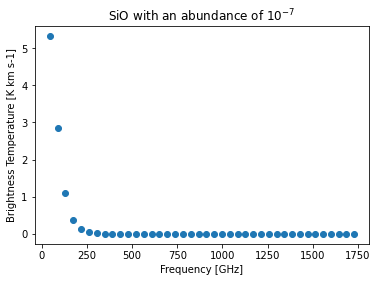

In [5]:
freq = ([l["freq"] for l in lines] * u.Hz).to(u.GHz)
TB = [l["intTB"] for l in lines] * u.K * u.km / u.second
plt.plot(freq, TB, "o")
plt.xlabel('Frequency [GHz]')
plt.ylabel('Brightness Temperature [K km s-1]')
plt.title('SiO with an abundance of 10$^{-7}$')

In [6]:
print(freq[4])

217.10498 GHz


In [7]:
def bright_temp(lines, n):
    TB = [l["intTB"] for l in lines] #* u.K * u.km / u.second
    return TB[n]

In [8]:
#### SiO
# 10^-13 to 10^-6
# 10^-6 to 10^-7 in high velocity gas, less than 10^-11 in ambient medium from Schilke et al 1997
i = 0
abund = 10**np.linspace(-13, -6, num=10)#np.linspace(10**-13, 10**-6, num=10)#
TB = np.zeros(10)
#abund = 10**(-7)

for ance in abund:
    g5.addEmitter("SiO", ance)
    lines = g5.lineLum("SiO")
    TB[i] = bright_temp(lines, n=4)
    i += 1

In [9]:
from spectral_cube import SpectralCube
from astropy import units as u

#mom0 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/sum/spw27_SiO/g5.mom0.smK.tot.SiO.spw27.im', format='casa_image')
cocube = SpectralCube.read('/home/savannahgramze/orange_link/adamginsburg/cmz/g5/G5/a/TP/2018.1.00862.S/galreprojected/g5a.SiO.spw27.fits').with_spectral_unit(u.km/u.s, velocity_convention='radio')
mom0 = cocube.moment0()

fatal: detected dubious ownership in repository at '/blue/adamginsburg/adamginsburg/repos/dask'
To add an exception for this directory, call:

	git config --global --add safe.directory /blue/adamginsburg/adamginsburg/repos/dask


In [10]:
np.nanmax(mom0)

<Projection 4.89714977 K km / s>

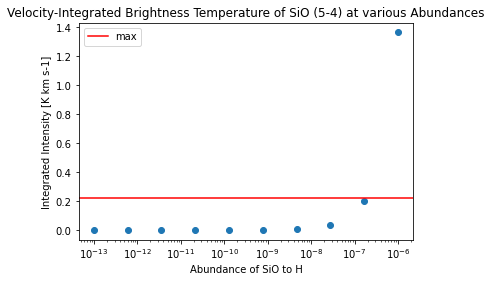

In [11]:
with quantity_support():
    plt.plot(abund, TB, "o")

    #plt.axhline(y=cocube.max(), color='r', linestyle='-', label='max')
    #plt.axhline(y=cocube.mean(), color='g', linestyle='-', label='mean')
    #plt.axhline(y=cocube.min(), color='b', linestyle='-', label='min')

    plt.ylabel("Integrated Intensity [K km s-1]")
    #plt.ylabel("Velocity Integrated Brightness Temperature [K km s-1]")
    plt.xlabel("Abundance of SiO to H")
    plt.xscale("log")
    plt.axhline(y=cocube.max(), color='r', linestyle='-', label='max')
    plt.title("Velocity-Integrated Brightness Temperature of SiO (5-4) at various Abundances")
    #plt.title("Velocity-Integrated Brightness Temperature of SiO (5-4) at various Abundances")
    plt.legend()

In [12]:
def bright_temp(lines, n):
    TB = [l["intTB"] for l in lines] #* u.K * u.km / u.second
    return TB[n]

def bright_intense(lines, n):
    inten = [l["intIntensity"] for l in lines]
    return inten[n]

In [13]:
g5.dEdt?


Signature:
g5.dEdt(
    c1Grav=0.0,
    thin=False,
    LTE=False,
    fixedLevPop=False,
    noClump=False,
    escapeProbGeom='sphere',
    PsiUser=None,
    sumOnly=False,
    dustOnly=False,
    gasOnly=False,
    dustCoolOnly=False,
    dampFactor=None,
    verbose=False,
    overrideSkip=False,
)
Docstring:
Return instantaneous values of heating / cooling terms

Parameters
   c1Grav : float
      if this is non-zero, the cloud is assumed to be
      collapsing, and energy is added at a rate
      Gamma_grav = c1 mu_H m_H cs^2 sqrt(4 pi G rho)
   thin : Boolean
      if set to True, cloud is assumed to be opticall thin
   LTE : Boolean
     if set to True, gas is assumed to be in LTE
   fixedLevPop : Boolean
     if set to True, level populations and escape
     probabilities are not recomputed, so the cooling rate is
     based on whatever values are stored
   escapeProbGeom : string, 'sphere' or 'LVG' or 'slab'
     specifies the geometry to be assumed in calculating
     escape

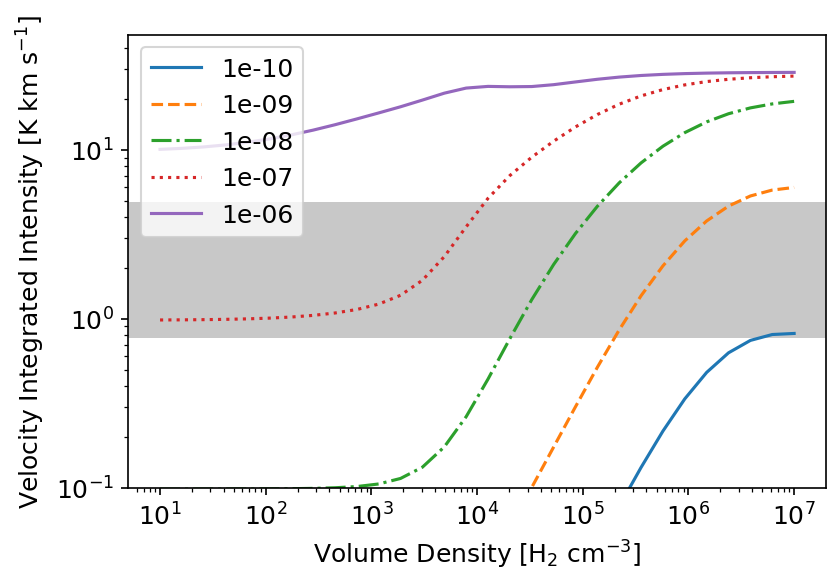

In [3]:
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

### SiO

g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 #cm/s
g5.Tg = 50#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1
# large velocity gradient approximation 
# sigma const, but looking through less? material

vol_dense = 10**np.linspace(1, 7, num=30) # 100 to 10^8
T_gas = np.linspace(20, 200, num=10) # 20 to 200 K
#abundance = 10**np.linspace(-13, -6, num=10) # 10^-13 to 10^-6

TB = np.zeros(vol_dense.size)
tau = np.zeros(vol_dense.size)
Tex = np.zeros(vol_dense.size)
#intense = np.zeros(vol_dense.size)
#Hint = np.zeros(vol_dense.size)
#Tupper = np.zeros(vol_dense.size)
#tauDust = np.zeros(vol_dense.size)

#abundance = 10**np.linspace(-13, -6, num=8) # 10^-13 to 10^-6
abundance = 10**np.linspace(-10, -6, num=5) # 10^-13 to 10^-6
#abundance = 10**np.linspace(-10, -9, num=5) # 10^-13 to 10^-6

#fig, ax = plt.subplots()
plt.figure(figsize=(6,4),dpi=150)
plt.rcParams.update({'font.size': 12})
#plt.figure(figsize=(9, 3))

#default_cycler = (cycler(linestyle=linestyle_tuple))

#plt.rc('lines', linewidth=2)
#plt.rc('axes', prop_cycle=default_cycler)

for a in abundance:
    for n in range(vol_dense.size): 
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        g5.addEmitter("SiO", a)
        lines = g5.lineLum("SiO")
        #print(g5.colDen, g5.nH, g5.sigmaNT)
        l = lines[4]
        
        TB[n] = l['intTB']
        tau[n] = l['tau']
        Tex[n] = l['Tex']
        #intense[n] = l['intIntensity']
        #Hint[n] = l['lumPerH']
        #Tupper[n] = l['Tupper']
        #tauDust[n] = l['tauDust']
        
        #TB[n] = bright_temp(lines,4)
        #intense[n] = bright_intense(lines, 4)
        
    #print('Abundance:', a)
    lab = format(a, '.3g') #str(a)
    
    ### Velocity Integrated Intensity versus Volume Density 
    #'''
    title = 'Abundance: ' + str(a)# + ' SiO molecules per H nucleus'
    #print(a)
    plt.plot(vol_dense, TB, next(linecycler), label=lab)
    #plt.plot(vol_dense, TB, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H$_2$ cm$^{-3}$]')
    plt.ylabel('Velocity Integrated Intensity [K km s$^{-1}$]')
    try: 
        #plt.axhline(y=3.159198, color='r', linestyle='--')#, label='max') 
        
        #plt.axhline(y=4.8907389, color='k', linestyle='--')
        #plt.axhline(y=0.76873781, color='k', linestyle='--')
        
        plt.axhspan(0.76873781, 4.8907389, facecolor='0.5', alpha=0.1)
    except:
        print('oops')
    #'''
    
    ### Tau
    '''
    plt.plot(vol_dense, tau, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Opacity')
    '''
    
     ### Excitation Temperature
    '''
    plt.plot(vol_dense, Tex,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Tex [K]')
    plt.title('Excitation Temperature')
    '''
    
    ### frequency-integrated intensity of the line after subtracting off the CMB contribution, in ergcm−2s−1sr−1 
    '''
    plt.plot(vol_dense, intense, label = lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Frequency Integrated Intensity [erg cm−2 s−1 sr−1]')
    '''
    
    ### rate of energy emission in the line per H nucleus in the cloud, in ergs−1
    '''
    plt.plot(vol_dense, Hint,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Emission per H [erg s-1]')
    '''
    ### Tupper
    '''
    plt.plot(vol_dense, Tupper,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Tupper [K]')
    '''
    
    ### Tau Dust
    '''
    plt.plot(vol_dense, tauDust, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Dust Opacity')
    '''
    
    #plt.title(title)
    #plt.show()
plt.legend()
#plt.ylim(top=20)
plt.yscale('log')
plt.ylim(bottom=0.1) 

#plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/despoticsio.png')
plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/despoticsio.pdf', bbox_inches='tight')

In [15]:
print(lines[4])

{'freq': 217104980000.0, 'upper': 5, 'lower': 4, 'Tupper': 31.259010318338213, 'Tex': 49.91794757550052, 'lumPerH': 3.7886020449867596e-28, 'intIntensity': 3.0124209152159244e-07, 'intTB': 28.72468249227014, 'tau': 478.6532831592103, 'tauDust': 0.0021712761411414616}


In [16]:
print(Tex)

[ 3.95909829  3.88374171  3.78427795  3.66567641  3.54601016  3.46036834
  3.4572976   3.58791235  3.90003015  4.44964968  5.32772971  6.70552891
  8.91396806 12.47451655 17.76671255 24.34598071 30.91286354 36.32802945
 40.36175731 43.29552709 45.41567543 46.92412865 47.97327927 48.68541376
 49.15801203 49.46584561 49.66350019 49.78907628 49.86826496 49.91794758]


In [17]:
# L = N/n = 1e22 / 1e6
# const = sigma / L = sigma * n / N
# sigma = const * N / n
const = g5.sigmaNT * 1e6 / 1e22
const 
# so if the new voldense = 1e5
# g5.sigmaNT = g5.sigmaNT*10 = g5.sigmaNT * 1e6 / voldens

2e-15

In [9]:
abunn = 10**-9
g5.addEmitter("HC3N-H2", abunn)


Fetching LAMDA datafile from http://home.strw.leidenuniv.nl/~moldata/datafiles/hc3n-h2.dat...


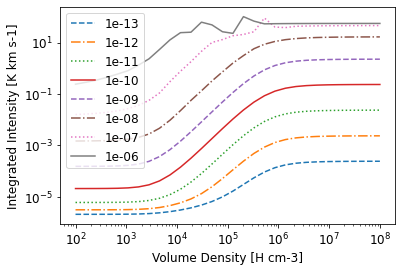

In [19]:
def bright_temp(lines, n):
    TB = [l["intTB"] for l in lines] #* u.K * u.km / u.second
    return TB[n]

### HC3N
g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5
g5.Tg = 80#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1

vol_dense = 10**np.linspace(2, 8, num=30) # 100 to 10^8
T_gas = np.linspace(20, 200, num=10) # 20 to 200 K
#abundance = 10**np.linspace(-13, -6, num=10) # 10^-13 to 10^-6

TB = np.zeros(vol_dense.size)
abundance = 10**np.linspace(-13, -6, num=8) # 10^-13 to 10^-6

fig, ax = plt.subplots()
#plt.figure(figsize=(9, 3))

#default_cycler = (cycler(linestyle=linestyle_tuple))

#plt.rc('lines', linewidth=2)
#plt.rc('axes', prop_cycle=default_cycler)

for a in abundance:
    for n in range(vol_dense.size):
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        g5.addEmitter("HC3N-H2", a)
        lines = g5.lineLum("HC3N-H2")
        TB[n] = bright_temp(lines, 23)
    #print('Abundance:', a)
    
    title = 'Abundance: ' + str(a)# + ' SiO molecules per H nucleus'
    #print(a)
    lab = format(a, '.3g') #str(a)
    plt.plot(vol_dense, TB, next(linecycler), label=lab)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Integrated Intensity [K km s-1]')
    #try: 
    #    ax.axhline(y=3.159198, color='r', linestyle='-')#, label='max')
    #except:
    #    print('oops')
    #plt.title(title)
    #plt.show()
plt.legend()
#plt.ylim(top=5)
#plt.ylim(bottom=0)
freq = ([l["freq"] for l in lines] * u.Hz).to(u.GHz)


In [20]:
print(freq[23]) # ~218

218.32472 GHz


In [18]:
freq[23]

<Quantity 218.32472 GHz>

In [21]:
g5.addEmitter('ph2co-h2', 19**-8)

Fetching LAMDA datafile from http://home.strw.leidenuniv.nl/~moldata/datafiles/ph2co-h2.dat...


In [22]:
lines = g5.lineLum("ph2co-h2")

/blue/adamginsburg/adamginsburg/repos/despotic/despotic/radiation.py:107: RuntimeWarning: divide by zero encountered in divide
  expfacdust = np.exp(-Tnu/self.TradDust)


In [26]:
freq = ([l["freq"] for l in lines] * u.Hz).to(u.GHz)
freq[2]

<Quantity 218.222192 GHz>

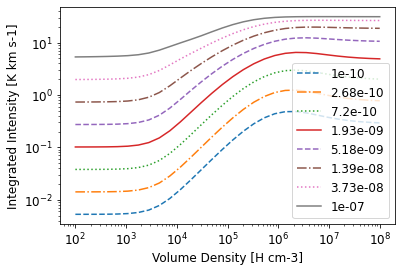

In [30]:
def bright_temp(lines, n):
    TB = [l["intTB"] for l in lines] #* u.K * u.km / u.second
    return TB[n]

### H2CO
g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5
g5.Tg = 50#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1

vol_dense = 10**np.linspace(2, 8, num=30) # 100 to 10^8
T_gas = np.linspace(20, 200, num=10) # 20 to 200 K
#abundance = 10**np.linspace(-13, -6, num=10) # 10^-13 to 10^-6

TB = np.zeros(vol_dense.size)
abundance = 10**np.linspace(-10, -7, num=8) # 10^-13 to 10^-6

fig, ax = plt.subplots()
#plt.figure(figsize=(9, 3))

#default_cycler = (cycler(linestyle=linestyle_tuple))

#plt.rc('lines', linewidth=2)
#plt.rc('axes', prop_cycle=default_cycler)

for a in abundance:
    for n in range(vol_dense.size):
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        g5.addEmitter("ph2co-h2", a)
        lines = g5.lineLum("ph2co-h2")
        TB[n] = bright_temp(lines, 2)
    #print('Abundance:', a)
    
    title = 'Abundance: ' + str(a)# + ' SiO molecules per H nucleus'
    #print(a)
    lab = format(a, '.3g') #str(a)
    plt.plot(vol_dense, TB, next(linecycler), label=lab)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Integrated Intensity [K km s-1]')
    #try: 
    #    ax.axhline(y=3.159198, color='r', linestyle='-')#, label='max')
    #except:
    #    print('oops')
    #plt.title(title)
    #plt.show()
plt.legend()
#plt.ylim(top=5)
#plt.ylim(bottom=0)
freq = ([l["freq"] for l in lines] * u.Hz).to(u.GHz)


/blue/adamginsburg/adamginsburg/repos/despotic/despotic/radiation.py:107: RuntimeWarning: divide by zero encountered in divide
  expfacdust = np.exp(-Tnu/self.TradDust)


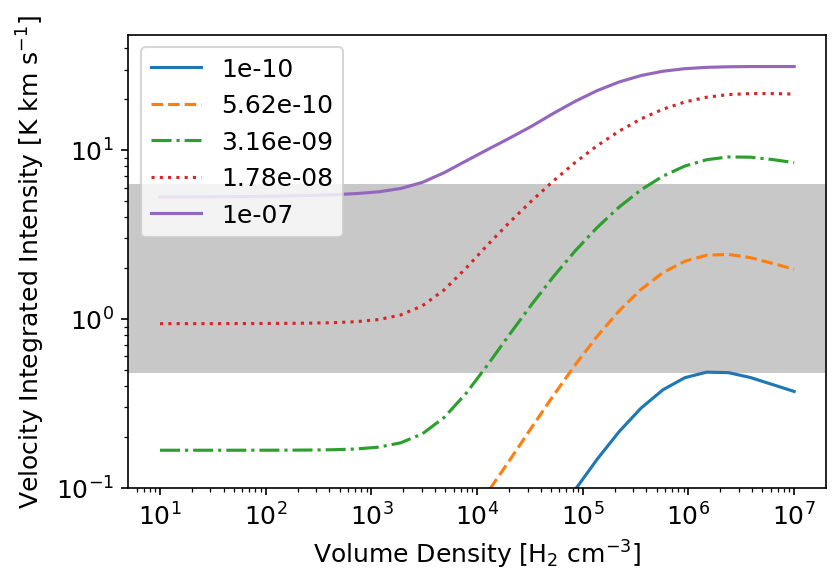

In [42]:
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

### H2CO

g5 = cloud()
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5 #cm/s
g5.Tg = 50#150#80.0 #50.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1
# large velocity gradient approximation 
# sigma const, but looking through less? material

vol_dense = 10**np.linspace(1, 7, num=30) # 100 to 10^8
T_gas = np.linspace(20, 200, num=10) # 20 to 200 K
#abundance = 10**np.linspace(-13, -6, num=10) # 10^-13 to 10^-6

TB = np.zeros(vol_dense.size)
tau = np.zeros(vol_dense.size)
Tex = np.zeros(vol_dense.size)
#intense = np.zeros(vol_dense.size)
#Hint = np.zeros(vol_dense.size)
#Tupper = np.zeros(vol_dense.size)
#tauDust = np.zeros(vol_dense.size)

#abundance = 10**np.linspace(-13, -6, num=8) # 10^-13 to 10^-6
abundance = 10**np.linspace(-10, -7, num=5) # 10^-13 to 10^-6
#abundance = 10**np.linspace(-10, -9, num=5) # 10^-13 to 10^-6

#fig, ax = plt.subplots()
plt.figure(figsize=(6,4),dpi=150)
plt.rcParams.update({'font.size': 12})
#plt.figure(figsize=(9, 3))

#default_cycler = (cycler(linestyle=linestyle_tuple))

#plt.rc('lines', linewidth=2)
#plt.rc('axes', prop_cycle=default_cycler)

for a in abundance:
    for n in range(vol_dense.size): 
        g5.nH = vol_dense[n]
        g5.sigmaNT = 2e-14 * g5.colDen / g5.nH
        if g5.sigmaNT < sound_speed:
            print('don\'t plot?')
            #vs =np.sqrt(k * T / m_h2co)
        #print(g5.sigmaNT)
        g5.addEmitter("ph2co-h2", a)
        lines = g5.lineLum("ph2co-h2")
        #print(g5.colDen, g5.nH, g5.sigmaNT)
        l = lines[2]
        
        TB[n] = l['intTB']
        tau[n] = l['tau']
        Tex[n] = l['Tex']
        #intense[n] = l['intIntensity']
        #Hint[n] = l['lumPerH']
        #Tupper[n] = l['Tupper']
        #tauDust[n] = l['tauDust']
        
        #TB[n] = bright_temp(lines,4)
        #intense[n] = bright_intense(lines, 4)
        
    #print('Abundance:', a)
    lab = format(a, '.3g') #str(a)
    
    ### Velocity Integrated Intensity versus Volume Density 
    #'''
    title = 'Abundance: ' + str(a)# + ' SiO molecules per H nucleus'
    #print(a)
    plt.plot(vol_dense, TB, next(linecycler), label=lab)
    #plt.plot(vol_dense, TB, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H$_2$ cm$^{-3}$]')
    plt.ylabel('Velocity Integrated Intensity [K km s$^{-1}$]')
    try: 
        #plt.axhline(y=3.159198, color='r', linestyle='--')#, label='max') 
        
        #plt.axhline(y=4.8907389, color='k', linestyle='--')
        #plt.axhline(y=0.76873781, color='k', linestyle='--')
        
        plt.axhspan(0.47637372, 6.3311937, facecolor='0.5', alpha=0.1)
    except:
        print('oops')
    #'''
    
    ### Tau
    '''
    plt.plot(vol_dense, tau, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Opacity')
    '''
    
     ### Excitation Temperature
    '''
    plt.plot(vol_dense, Tex,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Tex [K]')
    plt.title('Excitation Temperature')
    '''
    
    ### frequency-integrated intensity of the line after subtracting off the CMB contribution, in ergcm−2s−1sr−1 
    '''
    plt.plot(vol_dense, intense, label = lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Frequency Integrated Intensity [erg cm−2 s−1 sr−1]')
    '''
    
    ### rate of energy emission in the line per H nucleus in the cloud, in ergs−1
    '''
    plt.plot(vol_dense, Hint,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Emission per H [erg s-1]')
    '''
    ### Tupper
    '''
    plt.plot(vol_dense, Tupper,label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Tupper [K]')
    '''
    
    ### Tau Dust
    '''
    plt.plot(vol_dense, tauDust, label=lab)
    plt.xscale('log')
    plt.xlabel('Volume Density [H cm-3]')
    plt.ylabel('Dust Opacity')
    '''
    
    #plt.title(title)
    #plt.show()
plt.legend()
#plt.ylim(top=20)
plt.yscale('log')
plt.ylim(bottom=0.1) 

plt.savefig('/orange/adamginsburg/cmz/g5/code/plots/despotich2co.pdf', bbox_inches='tight')